# Non Color 3D

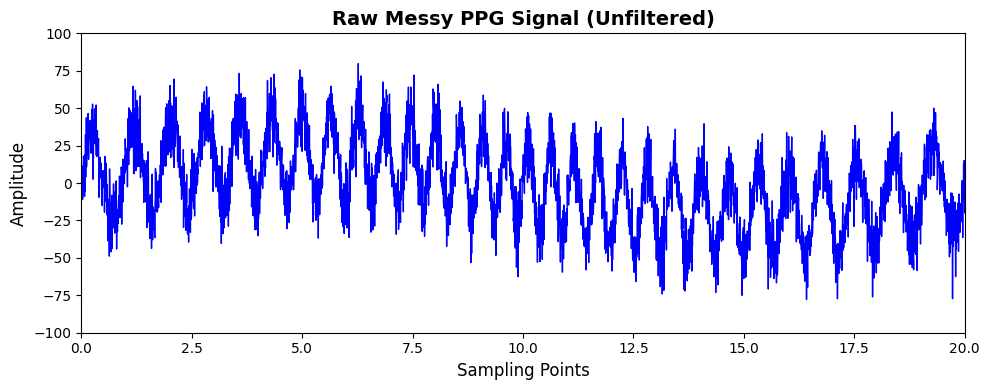

In [ ]:
import numpy as np
import plotly.graph_objs as go
import plotly.io as pio

# Optional: Force external browser rendering
pio.renderers.default = "browser"

# Create wavelength axes
x = np.linspace(400, 1100, 701)
y = np.linspace(400, 1100, 701)
X, Y = np.meshgrid(x, y)

# Initialize Z with zeros
Z = np.zeros_like(X)

# Lock random seed
np.random.seed(42)

# Create multiple random diagonal peaks
num_diag_peaks = 3
for _ in range(num_diag_peaks):
    center = np.random.uniform(400, 1100)
    peak_height = np.random.uniform(400, 200)
    sigma = np.random.uniform(30, 80)
    Z += peak_height * np.exp(-(((X - center)**2 + (Y - center)**2) / (2 * sigma**2)))

# Create small off-diagonal random bumps
num_offdiag_peaks = 20
for _ in range(num_offdiag_peaks):
    center_x = np.random.uniform(400, 1100)
    center_y = np.random.uniform(400, 1100)
    if abs(center_x - center_y) < 30:
        continue
    peak_height = np.random.uniform(20, 100)
    sigma = np.random.uniform(20, 60)
    Z += peak_height * np.exp(-(((X - center_x)**2 + (Y - center_y)**2) / (2 * sigma**2)))

# Clip any negatives
Z = np.clip(Z, 0, None)

# Define plane region and height
plane_x_min = 750
plane_x_max = 875
plane_y_min = 750
plane_y_max = 875
plane_z = 250

# Mask for points within the plane region AND above plane_z
mask_red = (
    (X >= plane_x_min) & (X <= plane_x_max) &
    (Y >= plane_y_min) & (Y <= plane_y_max) &
    (Z >= plane_z)
)

# Diagnostics: how many points satisfy this?
print("Number of red points:", np.sum(mask_red))

# Also check the max Z in the box to confirm
in_box = (
    (X >= plane_x_min) & (X <= plane_x_max) &
    (Y >= plane_y_min) & (Y <= plane_y_max)
)
print("Max Z in box:", np.max(Z[in_box]))

# Original surface
surface_original = go.Surface(
    x=X,
    y=Y,
    z=Z,
    colorscale='Viridis',
    cmin=0,
    cmax=700,
    showscale=False,
    opacity=1
)

# Compute normalized Z in the masked region
Z_in_mask = Z[mask_red]
if len(Z_in_mask) > 0:
    min_z = np.min(Z_in_mask)
    max_z = np.max(Z_in_mask)
    norm_Z = (Z - min_z) / (max_z - min_z + 1e-9)
    norm_Z = np.clip(norm_Z, 0, 1)
else:
    norm_Z = np.zeros_like(Z)

# Prepare surface with gradient colors
Z_gradient = np.where(mask_red, Z, np.nan)
norm_Z_gradient = np.where(mask_red, norm_Z, np.nan)

surface_gradient = go.Surface(
    x=X,
    y=Y,
    z=Z_gradient,
    surfacecolor=norm_Z_gradient,  # Use normalized Z to drive color
    colorscale=[
        [0.0, 'yellow'],
        [1.0, 'red']
    ],
    showscale=False,
    opacity=1
)

# Plane at Z=300
Z_plane = np.full_like(Z, plane_z)
Z_plane = np.where(
    (X >= plane_x_min) & (X <= plane_x_max) &
    (Y >= plane_y_min) & (Y <= plane_y_max),
    Z_plane,
    np.nan
)

surface_plane = go.Surface(
    x=X,
    y=Y,
    z=Z_plane,
    colorscale=[[0, 'skyblue'], [1, 'skyblue']],
    showscale=False,
    opacity=0.5
)

# Create text marker at (820,820) with z~400
x_coord = 820
y_coord = 820
z_text = 380

text_marker = go.Scatter3d(
    x=[x_coord],
    y=[y_coord],
    z=[z_text + 15],  # offset above the surface
    mode='text',
    text=(f"Wavelength 515 nm"),
    textposition="top center",
    textfont=dict(color='green', size=20)
)

layout = go.Layout(
    title='Simulated 3D Mountain with Red Highlight Above Plane Z=300',
    scene=dict(
        xaxis=dict(visible=False),
        yaxis=dict(visible=False),
        zaxis=dict(visible=False),
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.2))
    ),
    autosize=True,
    margin=dict(l=0, r=0, b=0, t=0)
)

# Important: draw red surface last so it is on top
fig = go.Figure(
    data=[surface_original, surface_plane, surface_gradient, text_marker],
    layout=layout
)
fig.show()


# Colorful 3D

In [37]:
import numpy as np
import plotly.graph_objs as go
import plotly.io as pio

pio.renderers.default = "browser"

# Create wavelength axes
x = np.linspace(400, 1100, 701)
y = np.linspace(400, 1100, 701)
X, Y = np.meshgrid(x, y)

Z = np.zeros_like(X)

np.random.seed(42)

# Diagonal peaks
num_diag_peaks = 3
for _ in range(num_diag_peaks):
    center = np.random.uniform(400, 1100)
    peak_height = np.random.uniform(400, 200)
    sigma = np.random.uniform(30, 80)
    Z += peak_height * np.exp(-(((X - center)**2 + (Y - center)**2) / (2 * sigma**2)))

# Off-diagonal bumps
num_offdiag_peaks = 20
for _ in range(num_offdiag_peaks):
    center_x = np.random.uniform(400, 1100)
    center_y = np.random.uniform(400, 1100)
    if abs(center_x - center_y) < 30:
        continue
    peak_height = np.random.uniform(20, 100)
    sigma = np.random.uniform(20, 60)
    Z += peak_height * np.exp(-(((X - center_x)**2 + (Y - center_y)**2) / (2 * sigma**2)))

Z = np.clip(Z, 0, None)

xplane = 812.5
yplane = 812.5

plane_x_min = xplane-62.5
plane_x_max = xplane+62.5
plane_y_min = yplane-62.5
plane_y_max = yplane+62.5
plane_z = 250

# Normalize X over 400–1100
norm_x = (X - 400) / (1100 - 400)
norm_x = np.clip(norm_x, 0, 1)

# Colorscale: 0–0.43 is visible spectrum, >0.43 is black
colorscale_full = [
    [0.0, 'indigo'],
    [0.15, 'blue'],
    [0.3, 'cyan'],
    [0.5, 'green'],
    [0.65, 'yellow'],
    [0.85, 'red'],
    [0.86, 'black'],
    [1.0, 'black']
]

# Main surface colored by wavelength
surface_wavelength = go.Surface(
    x=X,
    y=Y,
    z=Z,
    surfacecolor=norm_x,
    colorscale=colorscale_full,
    cmin=0,
    cmax=1,
    showscale=False,
    opacity=1
)

# Plane
Z_plane = np.full_like(Z, plane_z)
Z_plane = np.where(
    (X >= plane_x_min) & (X <= plane_x_max) &
    (Y >= plane_y_min) & (Y <= plane_y_max),
    Z_plane,
    np.nan
)

surface_plane = go.Surface(
    x=X,
    y=Y,
    z=Z_plane,
    colorscale=[[0, 'skyblue'], [1, 'skyblue']],
    showscale=False,
    opacity=0.5
)

layout = go.Layout(
    title='Spectrometer Response with Extended Wavelength Colors',
    scene=dict(
        xaxis=dict(
            visible=False,
            showgrid=False,
            zeroline=False,
            showticklabels=False
        ),
        yaxis=dict(
            visible=False,
            showgrid=False,
            zeroline=False,
            showticklabels=False
        ),
        zaxis=dict(
            visible=False,
            showgrid=False,
            zeroline=False,
            showticklabels=False
        ),
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.2))
    ),
    autosize=True,
    margin=dict(l=0, r=0, b=0, t=0)
)

fig = go.Figure(
    data=[
        surface_wavelength,
        surface_plane
    ],
    layout=layout
)

fig.show()


In [ ]:
import numpy as np
import plotly.graph_objs as go
import plotly.io as pio

pio.renderers.default = "browser"

# Create wavelength axes
x = np.linspace(400, 1100, 701)
y = np.linspace(400, 1100, 701)
X, Y = np.meshgrid(x, y)

Z = np.zeros_like(X)

np.random.seed(42)

# Diagonal peaks
num_diag_peaks = 3
for _ in range(num_diag_peaks):
    center = np.random.uniform(400, 1100)
    peak_height = np.random.uniform(400, 200)
    sigma = np.random.uniform(30, 80)
    Z += peak_height * np.exp(-(((X - center) ** 2 + (Y - center) ** 2) / (2 * sigma ** 2)))

# Off-diagonal bumps
num_offdiag_peaks = 20
for _ in range(num_offdiag_peaks):
    center_x = np.random.uniform(400, 1100)
    center_y = np.random.uniform(400, 1100)
    if abs(center_x - center_y) < 30:
        continue
    peak_height = np.random.uniform(20, 100)
    sigma = np.random.uniform(20, 60)
    Z += peak_height * np.exp(-(((X - center_x) ** 2 + (Y - center_y) ** 2) / (2 * sigma ** 2)))

Z = np.clip(Z, 0, None)

# ✅ Example: list of plane specifications:
# Each is (x, y, z, radius)
plane_specs = [
    (650, 720, 200, 60),  # center x, center y, z height, radius
    (800, 800, 250, 80)         # second plane with different radius
]

# Normalize X over 400–1100
norm_x = (X - 400) / (1100 - 400)
norm_x = np.clip(norm_x, 0, 1)

# Colorscale: 0–0.43 is visible spectrum, >0.43 is black
colorscale_full = [
    [0.0, 'indigo'],
    [0.15, 'blue'],
    [0.3, 'cyan'],
    [0.5, 'green'],
    [0.65, 'yellow'],
    [0.85, 'red'],
    [0.86, 'black'],
    [1.0, 'black']
]

# Main surface colored by wavelength
surface_wavelength = go.Surface(
    x=X,
    y=Y,
    z=Z,
    surfacecolor=norm_x,
    colorscale=colorscale_full,
    cmin=0,
    cmax=1,
    showscale=False,
    opacity=1
)

# Create all planes with their own radii
plane_surfaces = []
for center_x, center_y, center_z, radius in plane_specs:
    plane_x_min = center_x - radius
    plane_x_max = center_x + radius
    plane_y_min = center_y - radius
    plane_y_max = center_y + radius

    Z_plane = np.full_like(Z, center_z)
    Z_plane = np.where(
        (X >= plane_x_min) & (X <= plane_x_max) &
        (Y >= plane_y_min) & (Y <= plane_y_max),
        Z_plane,
        np.nan
    )

    plane_surface = go.Surface(
        x=X,
        y=Y,
        z=Z_plane,
        colorscale=[[0, 'skyblue'], [1, 'skyblue']],
        showscale=False,
        opacity=0.5
    )
    plane_surfaces.append(plane_surface)

# ✅ Camera orientation parameters (Zoom and orientation)
camera = dict(
    eye=dict(x=1.66014159155188, y=-1.1928503927265655, z=1.3153799931655155),
    center=dict(x=0, y=0, z=0)
)

layout = go.Layout(
    title='Spectrometer Response with Multiple Planes and Custom Radii',
    scene=dict(
        xaxis=dict(
            visible=False,
            showgrid=False,
            zeroline=False,
            showticklabels=False
        ),
        yaxis=dict(
            visible=False,
            showgrid=False,
            zeroline=False,
            showticklabels=False
        ),
        zaxis=dict(
            visible=False,
            showgrid=False,
            zeroline=False,
            showticklabels=False
        ),
        camera=camera
    ),
    autosize=True,
    margin=dict(l=0, r=0, b=0, t=0)
)

fig = go.Figure(
    data=[surface_wavelength] + plane_surfaces,
    layout=layout
)

fig.show()


# Target Peak 3D

In [13]:
import numpy as np
import plotly.graph_objs as go
import plotly.io as pio

def wavelength_to_rgb(wavelength_nm):
    """
    Approximate RGB color corresponding to a wavelength in nm.
    Returns a string 'rgb(r, g, b)'.
    """
    gamma = 0.8
    intensity_max = 255

    if wavelength_nm < 380 or wavelength_nm > 780:
        R = G = B = 0
    elif wavelength_nm < 440:
        attenuation = 0.3 + 0.7*(wavelength_nm - 380)/(440 - 380)
        R = ((-(wavelength_nm - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength_nm < 490:
        R = 0.0
        G = ((wavelength_nm - 440) / (490 - 440)) ** gamma
        B = 1.0 ** gamma
    elif wavelength_nm < 510:
        R = 0.0
        G = 1.0 ** gamma
        B = (-(wavelength_nm - 510) / (510 - 490)) ** gamma
    elif wavelength_nm < 580:
        R = ((wavelength_nm - 510) / (580 - 510)) ** gamma
        G = 1.0 ** gamma
        B = 0.0
    elif wavelength_nm < 645:
        R = 1.0 ** gamma
        G = (-(wavelength_nm - 645) / (645 - 580)) ** gamma
        B = 0.0
    else:
        attenuation = 0.3 + 0.7*(780 - wavelength_nm)/(780 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0

    R = int(R * intensity_max)
    G = int(G * intensity_max)
    B = int(B * intensity_max)

    return f"rgb({R},{G},{B})"

# Create normalized positions and colors
visible_wavelengths = np.linspace(400, 700, 30)
colorscale_visible = []

# Visible colors
for wl in visible_wavelengths:
    norm = (wl - 400) / (1100 - 400)
    color = wavelength_to_rgb(wl)
    colorscale_visible.append([norm, color])

# Transition from gray to black in infrared
# Define two steps: at 700 nm and 1100 nm
norm_700 = (700 - 400) / (1100 - 400)
norm_1100 = (1100 - 400) / (1100 - 400)

colorscale_visible.append([norm_700, "rgb(128,128,128)"])
colorscale_visible.append([norm_1100, "black"])


pio.renderers.default = "browser"

# Create wavelength axes
x = np.linspace(400, 1100, 701)
y = np.linspace(400, 1100, 701)
X, Y = np.meshgrid(x, y)

# Initialize Z to zero
Z = np.zeros_like(X)

# ✅ Define your desired peaks here:
# Each tuple: (center_x, center_y, peak_height, sigma)
peak_specs = [
    # ✅ On-diagonal peaks (bigger)
    (525, 525, 300, 50),
    (600, 600, 280, 45),
    (750, 750, 260, 55),
    (900, 900, 240, 50),
    
    # ✅ Off-diagonal peaks (smaller)
    (500, 650, 80, 40),
    (520, 700, 70, 35),
    (550, 800, 90, 38),
    (580, 850, 60, 42),
    (620, 500, 85, 33),
    (650, 540, 75, 36),
    (700, 580, 95, 39),
    (720, 620, 65, 34),
    (750, 680, 80, 37),
    (780, 730, 70, 35),
    (800, 770, 60, 40),
    (830, 820, 85, 38),
    (860, 500, 90, 45),
    (500, 860, 75, 42),
    (550, 900, 70, 40),
    (600, 950, 80, 43),
    (650, 1000, 85, 46),
    (700, 1050, 75, 39),
    (750, 1100, 65, 41),
    (800, 950, 90, 44)
]


# ✅ Generate Z from your specified peaks
for center_x, center_y, peak_height, sigma in peak_specs:
    Z += peak_height * np.exp(-(((X - center_x) ** 2 + (Y - center_y) ** 2) / (2 * sigma ** 2)))

Z = np.clip(Z, 0, None)

# ✅ Example: list of plane specifications:
# Each is (x, y, z, radius)
plane_specs = [
    (940, 940, 80, 30.5),
    (525, 525, 200, 100)
]

# Normalize X over 400–1100
norm_x = (X - 400) / (1100 - 400)
norm_x = np.clip(norm_x, 0, 1)

# Colorscale: 0–0.43 is visible spectrum, >0.43 is black
colorscale_full = [
    [0.0, 'indigo'],
    [0.15, 'blue'],
    [0.3, 'cyan'],
    [0.5, 'green'],
    [0.65, 'yellow'],
    [0.85, 'red'],
    [0.86, 'black'],
    [1.0, 'black']
]

# Main surface colored by wavelength
surface_wavelength = go.Surface(
    x=X,
    y=Y,
    z=Z,
    surfacecolor=norm_x,
    colorscale=colorscale_visible,
    cmin=0,
    cmax=1,
    showscale=False,
    opacity=1
)

# Create all planes with their own radii
plane_surfaces = []
for center_x, center_y, center_z, radius in plane_specs:
    plane_x_min = center_x - radius
    plane_x_max = center_x + radius
    plane_y_min = center_y - radius
    plane_y_max = center_y + radius

    Z_plane = np.full_like(Z, center_z)
    Z_plane = np.where(
        (X >= plane_x_min) & (X <= plane_x_max) &
        (Y >= plane_y_min) & (Y <= plane_y_max),
        Z_plane,
        np.nan
    )

    plane_surface = go.Surface(
        x=X,
        y=Y,
        z=Z_plane,
        colorscale=[[0, 'skyblue'], [1, 'skyblue']],
        showscale=False,
        opacity=0.5
    )
    plane_surfaces.append(plane_surface)

# Camera orientation
camera = dict(
    eye=dict(x=1.8437075548681852, y=0.6471589149237047, z=1.4514500127641983),
    center=dict(x=0, y=0, z=0)
)

layout = go.Layout(
    title='Spectrometer Response with Custom Peaks and Planes',
    scene=dict(
        xaxis=dict(visible=False, showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(visible=False, showgrid=False, zeroline=False, showticklabels=False),
        zaxis=dict(visible=False, showgrid=False, zeroline=False, showticklabels=False),
        camera=camera
    ),
    autosize=True,
    margin=dict(l=0, r=0, b=0, t=0)
)

fig = go.Figure(
    data=[surface_wavelength] + plane_surfaces,
    layout=layout
)

fig.show()


# Raw PPG Signal

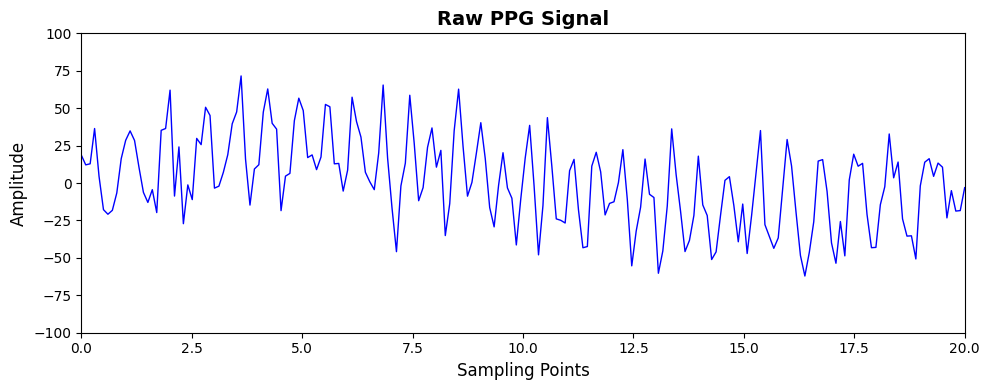

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
duration_seconds = 20
sampling_rate = 10
time = np.linspace(0, duration_seconds, duration_seconds * sampling_rate)

# Generate heart rate profile: 60 bpm -> 120 bpm -> 60 bpm
half_len = len(time) // 2
hr_ramp_up = np.linspace(60, 120, half_len)
hr_ramp_down = np.linspace(120, 60, len(time) - half_len)
heart_rate_bpm = np.concatenate((hr_ramp_up, hr_ramp_down))
heart_rate_hz = heart_rate_bpm / 60

# Simulate clean sine wave
ppg_signal = np.zeros_like(time)
phase = 0
for i in range(len(time)):
    freq = heart_rate_hz[i]
    phase += 2 * np.pi * freq / sampling_rate
    # Random amplitude modulation (0.5x - 1.5x)
    amplitude_mod = 30 * np.random.uniform(0.5, 1.5)
    ppg_signal[i] = amplitude_mod * np.sin(phase)

# Add baseline wander (low-frequency noise)
baseline_wander = 20 * np.sin(2 * np.pi * 0.05 * time)  # very slow drift

# Add high-frequency noise
high_freq_noise = np.random.normal(0, 10, len(time))

# Combine all
messy_ppg = ppg_signal + baseline_wander + high_freq_noise

# Plot
plt.figure(figsize=(10, 4))
plt.plot(time, messy_ppg, color='blue', linewidth=1)
plt.title('Raw PPG Signal', fontsize=14, fontweight='bold')
plt.xlabel('Sampling Points', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.xlim(time[0], time[-1])
plt.ylim(-100, 100)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.box(True)
plt.tight_layout()
plt.show()


## No border

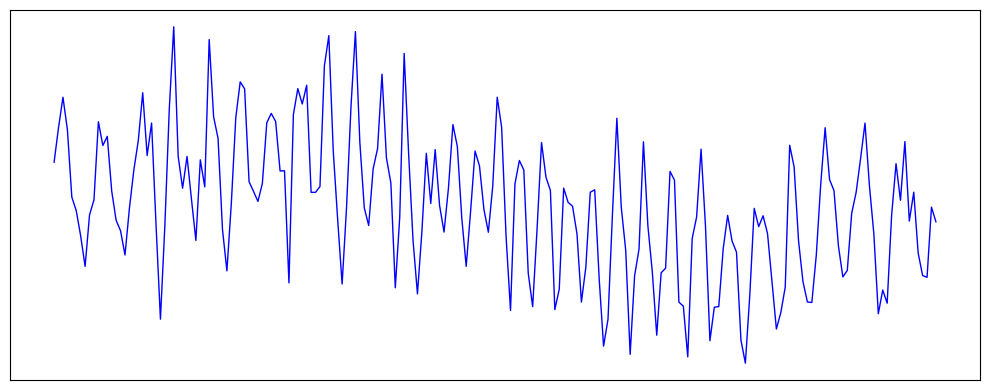

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
duration_seconds = 20
sampling_rate = 10
time = np.linspace(0, duration_seconds, duration_seconds * sampling_rate)

# Generate heart rate profile: 60 bpm -> 120 bpm -> 60 bpm
half_len = len(time) // 2
hr_ramp_up = np.linspace(60, 120, half_len)
hr_ramp_down = np.linspace(120, 60, len(time) - half_len)
heart_rate_bpm = np.concatenate((hr_ramp_up, hr_ramp_down))
heart_rate_hz = heart_rate_bpm / 60

# Simulate clean sine wave
ppg_signal = np.zeros_like(time)
phase = 0
for i in range(len(time)):
    freq = heart_rate_hz[i]
    phase += 2 * np.pi * freq / sampling_rate
    amplitude_mod = 30 * np.random.uniform(0.5, 1.5)
    ppg_signal[i] = amplitude_mod * np.sin(phase)

# Add baseline wander
baseline_wander = 20 * np.sin(2 * np.pi * 0.05 * time)

# Add high-frequency noise
high_freq_noise = np.random.normal(0, 10, len(time))

# Combine all
messy_ppg = ppg_signal + baseline_wander + high_freq_noise

# Plot
plt.figure(figsize=(10, 4))
plt.plot(time, messy_ppg, color='blue', linewidth=1)

# Remove ticks and labels
plt.xticks([])
plt.yticks([])

# No title or axis labels
# Just a border
plt.box(True)

plt.tight_layout()
plt.show()


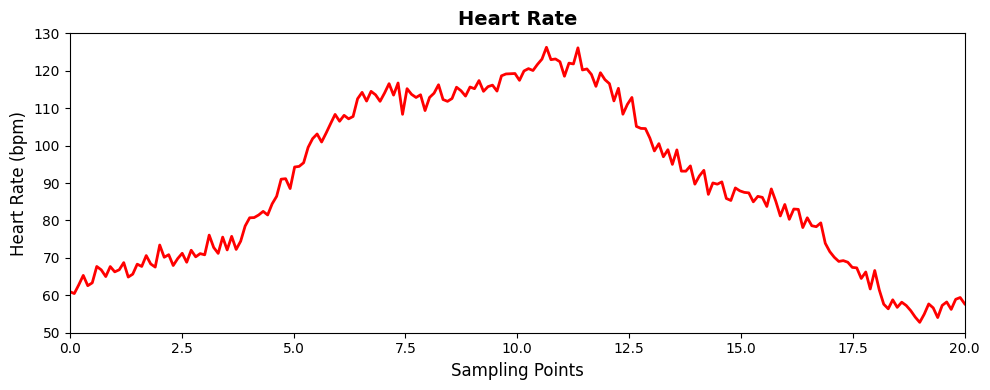

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
duration_seconds = 20
sampling_rate = 10
time = np.linspace(0, duration_seconds, duration_seconds * sampling_rate)

half_len = len(time) // 2

# Use sine easing for smooth ramp up/down
ramp_up = 60 + (120 - 60) * 0.5 * (1 - np.cos(np.linspace(0, np.pi, half_len)))
ramp_down = 120 - (120 - 60) * 0.5 * (1 - np.cos(np.linspace(0, np.pi, len(time) - half_len)))

base_hr = np.concatenate((ramp_up, ramp_down))

# Add large oscillations (simulate respiration sinus arrhythmia)
oscillation = 5 * np.sin(2 * np.pi * 0.2 * time) + 3 * np.sin(2 * np.pi * 0.05 * time)

# Add larger random jitter
np.random.seed(42)
jitter = np.random.normal(0, 2, len(time))

# Combine all
heart_rate_bpm = base_hr + oscillation + jitter

# Plot heart rate curve
plt.figure(figsize=(10, 4))
plt.plot(time, heart_rate_bpm, color='red', linewidth=2)
plt.title('Heart Rate', fontsize=14, fontweight='bold')
plt.xlabel('Sampling Points', fontsize=12)
plt.ylabel('Heart Rate (bpm)', fontsize=12)
plt.xlim(time[0], time[-1])
plt.ylim(50, 130)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.box(True)
plt.tight_layout()
plt.show()


## No Border

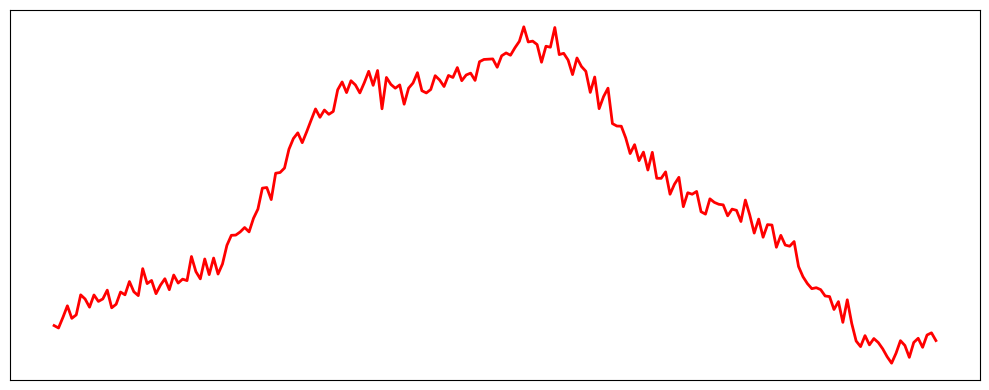

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
duration_seconds = 20
sampling_rate = 10
time = np.linspace(0, duration_seconds, duration_seconds * sampling_rate)

half_len = len(time) // 2

# Use sine easing for smooth ramp up/down
ramp_up = 60 + (120 - 60) * 0.5 * (1 - np.cos(np.linspace(0, np.pi, half_len)))
ramp_down = 120 - (120 - 60) * 0.5 * (1 - np.cos(np.linspace(0, np.pi, len(time) - half_len)))

base_hr = np.concatenate((ramp_up, ramp_down))

# Add large oscillations (simulate respiration sinus arrhythmia)
oscillation = 5 * np.sin(2 * np.pi * 0.2 * time) + 3 * np.sin(2 * np.pi * 0.05 * time)

# Add larger random jitter
np.random.seed(42)
jitter = np.random.normal(0, 2, len(time))

# Combine all
heart_rate_bpm = base_hr + oscillation + jitter

# Plot heart rate curve
plt.figure(figsize=(10, 4))
plt.plot(time, heart_rate_bpm, color='red', linewidth=2)

# Remove all labels, titles, ticks
plt.xticks([])
plt.yticks([])

# Just the border
plt.box(True)

plt.tight_layout()
plt.show()
